Install packages

In [1]:
!pip install azure-cognitiveservices-vision-computervision
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import packages and authenticate credentials

In [1]:
import os

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from matplotlib import pyplot as plt
import time

subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

Read all images from a folder and verify if the image has a bike and save in a dictionary the name of the image and if it has a bike or not
Also save the bounnding boxes for images that have a bike

In [3]:
computed_images = {}
bounding_boxes = {}
for img in os.listdir('images'):
    image_path = os.path.join('images', img)
    image = open(image_path, "rb")
    result = computervision_client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.objects])
    
    if any([obj.object_property == 'bicycle' or obj.object_property == 'bike' for obj in result.objects]):
        print(f'{img} has a bike')
        computed_images[img] = "bike"
        bounding_boxes[img] = [[ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h] for ob in result.objects if ob.object_property == 'bicycle' or ob.object_property == 'bike']
    else:
        print(f'{img} does not have a bike')
        computed_images[img] = "no_bike"
    image.close()
    time.sleep(3)

bike03.jpg has a bike
traffic05.jpg does not have a bike
bike04.jpg has a bike
animals.png does not have a bike
IoU.png does not have a bike
bike10.jpg has a bike
bike09.jpg has a bike
traffic01.jpg does not have a bike
traffic04.jpg does not have a bike
people.jpg does not have a bike
bike05.jpg has a bike
PR.png does not have a bike
binClass.png has a bike
cm.png does not have a bike
bike06.jpg does not have a bike
traffic02.jpg does not have a bike
bike02.jpg has a bike
traffic07.jpg does not have a bike
bike07.jpg has a bike
objectDetection.png does not have a bike
traffic03.jpg does not have a bike
bike1.jpg has a bike
IoU2.png does not have a bike
bike08.jpg does not have a bike
traffic06.jpg does not have a bike


Calculate the accuracy, precision and recall of the classifier

In [4]:
computed_images_ground_truth = {"animals.png": "no_bike", "bike1.jpg": "bike", "bike02.jpg": "bike", "bike03.jpg": "bike", "bike04.jpg": "bike", "bike05.jpg": "bike", "bike06.jpg": "bike", "bike07.jpg": "bike", "bike08.jpg": "bike", "bike09.jpg": "bike", "bike10.jpg": "bike", "binClass.png": "bike", "cm.png": "no_bike", "IoU.png": "no_bike", "IoU2.png": "no_bike", "objectDetection.png": "no_bike", "people.jpg": "no_bike", "PR.png": "no_bike", "traffic01.jpg": "no_bike", "traffic02.jpg": "no_bike", "traffic03.jpg": "no_bike", "traffic04.jpg": "no_bike", "traffic05.jpg": "no_bike", "traffic06.jpg": "no_bike", "traffic07.jpg": "no_bike"}

def eval_classifier(computed, ground_truth, pos, neg):
    """
    eval_classifier(computed_images, computed_images_ground_truth, pos, neg)
        This function evaluates the performance of a classifier
    :param computed: dictionary
    :param ground_truth: dictionary 
    :param pos: any
    :param neg: any
    :return: accuracy, precision, recall of the classifier
    """
    tp = sum([1 for i in ground_truth if computed[i] == pos and ground_truth[i] == pos])
    tn = sum([1 for i in ground_truth if computed[i] == neg and ground_truth[i] == neg])
    fp = sum([1 for i in ground_truth if computed[i] == pos and ground_truth[i] == neg])
    fn = sum([1 for i in ground_truth if computed[i] == neg and ground_truth[i] == pos])
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision_pos = tp / (tp + fp)
    recall_pos = tp / (tp + fn)
    precision_neg = tn / (tn + fn)
    recall_neg = tn / (tn + fp)
    
    return accuracy, [precision_pos, precision_neg], [recall_pos, recall_neg]

acc, prec, rec = eval_classifier(computed_images, computed_images_ground_truth, "bike", "no_bike")

print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')

Accuracy: 0.92, Precision: [1.0, 0.875], Recall: [0.8181818181818182, 1.0]


Plot the bounding boxes for the images that have a bike

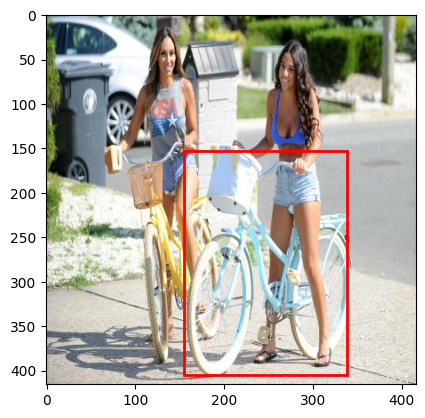

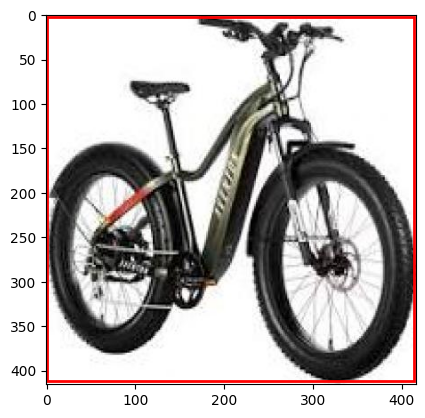

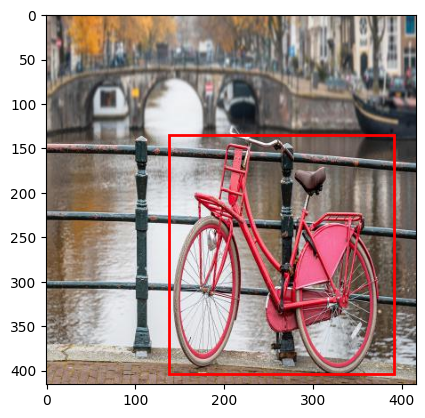

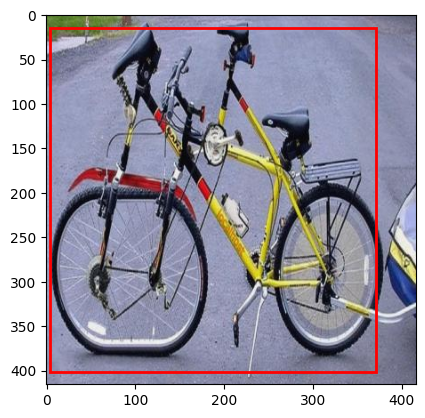

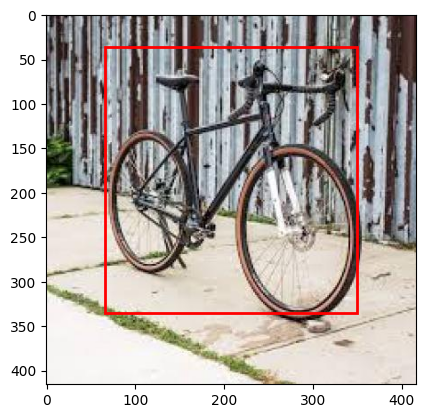

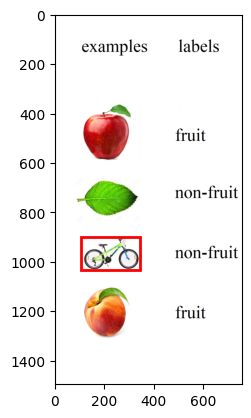

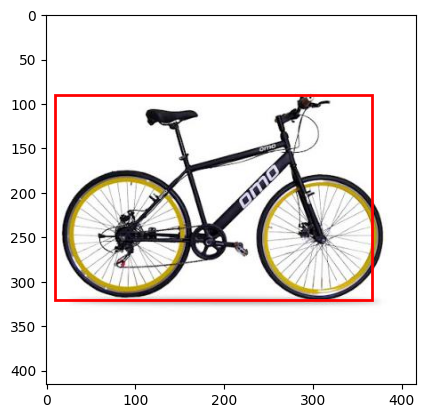

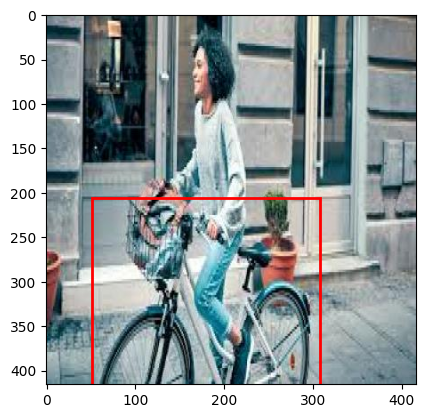

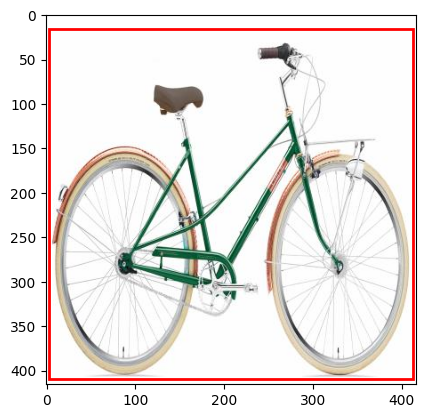

In [31]:
def plot_bounding_boxes(i, boxes, manual_labels=None):
    """
    plot_bounding_boxes(i, boxes)
        This function plots the bounding boxes for the images that have a bike
    :param i: string
    :param boxes: list of lists
    :param manual_labels: list of lists
    :return: plot of the image with the bounding boxes
    """
    im = plt.imread(os.path.join('images', i))
    fig = plt.imshow(im)
    for box in boxes:
        fig.axes.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', lw=2))
    if manual_labels:
        for box in manual_labels:
            fig.axes.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='blue', lw=2))
    plt.show()
    
for b in bounding_boxes:
    plot_bounding_boxes(b, bounding_boxes[b])


Label the images without AI algorithms and save the results in a dictionary

In [2]:
import cv2

def label_images(images):
    """
    label_images(images)
        This function labels the images without AI algorithms
    :param images: list of strings
    :return: dictionary with the name of the image and the label
    """
    labels = {}
    for i in images:
        imagine = cv2.imread(os.path.join('images', i))
        bbox = cv2.selectROI("Select the label",imagine, fromCenter=False, showCrosshair=True)
        cv2.destroyAllWindows()
        labels[i] = [[bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]]
    return labels

labels = label_images([i for i in os.listdir('images') if 'bike' in i])

# plot the bounding boxes for the images that have a bike and the manually labeled images
for b in labels:
    plot_bounding_boxes(b, bounding_boxes[b], labels[b])



NameError: name 'plot_bounding_boxes' is not defined

Evaluate the performance of the classifier with the manually labeled images by two different metrics:
- Intersection over Union (IoU)
- average precision

In [35]:
def error_of_detection(predicted, manually):
    """
    error_of_detection(predicted, manually)
        This function calculates the error of detection between two bounding boxes
    :param predicted: list
    :param manually: list
    :return: error of detection
    """
    err = 0
    for v in zip(predicted, manually):
        err = err + (v[0] - v[1])**2
    err /= 4
    return err

for b in labels:
    if b not in bounding_boxes:
        print(f'Error of detection for {b}: No bike detected')
    else:
        print(f'Error of detection for {b}: {error_of_detection(bounding_boxes[b][0], labels[b][0])}')

Error of detection for bike03.jpg: 35.75
Error of detection for bike04.jpg: 6.0
Error of detection for bike10.jpg: 135.0
Error of detection for bike09.jpg: 99.0
Error of detection for bike05.jpg: 162.75
Error of detection for bike06.jpg: No bike detected
Error of detection for bike02.jpg: 71.25
Error of detection for bike07.jpg: 93.5
Error of detection for bike1.jpg: 102.5
Error of detection for bike08.jpg: No bike detected


In [36]:
def intersection_over_union(box_a, box_b):
    """
    intersection_over_union(box_a, box_b)
        This function calculates the intersection over union between two bounding boxes
    :param box_a: list
    :param box_b: list
    :return: float
    """
    # determine the (x, y)-coordinates of the intersection rectangle
    x_a = max(box_a[0], box_b[0])
    y_a = max(box_a[1], box_b[1])
    x_b = min(box_a[2], box_b[2])
    y_b = min(box_a[3], box_b[3])
 
    # compute the area of intersection rectangle
    inter_area = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    box_a_area = (box_a[2] - box_a[0] + 1) * (box_a[3] - box_a[1] + 1)
    box_b_area = (box_b[2] - box_b[0] + 1) * (box_b[3] - box_b[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = inter_area / float(box_a_area + box_b_area - inter_area)
 
    # return the intersection over union value
    return iou

for b in labels:
    if b not in bounding_boxes:
        print(f'Intersection over Union for {b}: No bike detected')
    else:
        print(f'Intersection over Union for {b}: {intersection_over_union(bounding_boxes[b][0], labels[b][0])}')

Intersection over Union for bike03.jpg: 0.9075070458621574
Intersection over Union for bike04.jpg: 0.9809069212410502
Intersection over Union for bike10.jpg: 0.8720833101297544
Intersection over Union for bike09.jpg: 0.9200970481196927
Intersection over Union for bike05.jpg: 0.8651162790697674
Intersection over Union for bike06.jpg: No bike detected
Intersection over Union for bike02.jpg: 0.9226224684490012
Intersection over Union for bike07.jpg: 0.8759409505107402
Intersection over Union for bike1.jpg: 0.9165050941648657
Intersection over Union for bike08.jpg: No bike detected
